In [1]:
import pandas as pd

df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')

In [2]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
#Merge order products prior with orders and then merge with products
df_order_products_prior = pd.merge(df_order_products_prior, df_products, how='left', on='product_id')

df_prior_user_order_product = pd.merge(df_order_products_prior, df_orders, how='left', on='order_id')


In [5]:
df_prior_user_order_product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [6]:
Prior_User_Order_Product_inner = pd.merge(df_prior_user_order_product,
                                          df_orders[df_orders['eval_set']=='train'][['user_id','eval_set']], 
                                          how='inner', on='user_id')

In [7]:
Prior_User_Order_Product_inner.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set_x,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_y
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,train
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,train
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,train
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,train
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,train


In [8]:
#deal with white space in product name
Prior_User_Order_Product_inner['product_no_space'] = [e.replace(' ','_') for e in Prior_User_Order_Product_inner.product_name]

In [9]:
Prior_User_Order_Product_inner = Prior_User_Order_Product_inner.drop('product_name',axis=1)
Prior_User_Order_Product_inner.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set_x,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_y,product_no_space
0,2,33120,1,1,86,16,202279,prior,3,5,9,8.0,train,Organic_Egg_Whites
1,2,28985,2,1,83,4,202279,prior,3,5,9,8.0,train,Michigan_Organic_Kale
2,2,9327,3,0,104,13,202279,prior,3,5,9,8.0,train,Garlic_Powder
3,2,45918,4,1,19,13,202279,prior,3,5,9,8.0,train,Coconut_Butter
4,2,30035,5,0,17,13,202279,prior,3,5,9,8.0,train,Natural_Sweetener


In [10]:

user_habit = Prior_User_Order_Product_inner[['user_id','order_id',
                                       'product_no_space','order_dow',
                                       'order_hour_of_day','days_since_prior_order']]

In [11]:
import numpy as np
# Create a dataframe: average value of each user

In [12]:
user_avg = user_habit.groupby('user_id')['order_dow',
                                'order_hour_of_day',
                                'days_since_prior_order'].agg(np.nanmean)

In [13]:
# Total number of orders of each user
user_order = user_habit.groupby('user_id').order_id.nunique()
user_avg['num_of_orders'] = user_order

In [14]:
# Total number of products of each user
product_number = user_habit.groupby('user_id')['order_id'].agg('count')
user_avg['num_of_products'] = product_number

In [15]:
# add product name to each user
name_list = []
for p_name in user_habit.groupby('user_id')['product_no_space']:
        name_list.append(' '.join(p_name[1]))

# add the names to dataframe
user_avg['product_name'] = name_list

In [16]:
user_avg.head()

,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name
user_id,,,,,,
1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...
2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


In [17]:
# # Sample a fraction of data due to large computation
# sample_frac = 0.2
# product_name_DF_sample = user_avg.sample(frac = sample_frac, random_state=1)
# sample_user_id  = product_name_DF_sample.index
# print(sample_user_id)

In [18]:

# df_temp = product_name_DF_sample.drop_duplicates().groupby('product_name').count()
# print(len(df_temp))

In [19]:
# tokenize the words
from nltk.tokenize import sent_tokenize, word_tokenize

tokenized = user_avg['product_name'].apply(word_tokenize)
tokenized.head()

user_id
1    [Soda, Original_Beef_Jerky, Pistachios, Organi...
2    [Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po...
5    [Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt...
7    [85, %, _Lean_Ground_Beef, Organic_Apple_Slice...
8    [Organic_Baby_Spinach, Michigan_Organic_Kale, ...
Name: product_name, dtype: object

In [20]:
tokenized_df = pd.DataFrame(tokenized).reset_index()
tokenized_df.columns = ['user_id', 'products']
tokenized_df.head()

,user_id,products
0,1,"[Soda, Original_Beef_Jerky, Pistachios, Organi..."
1,2,"[Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po..."
2,5,"[Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt..."
3,7,"[85, %, _Lean_Ground_Beef, Organic_Apple_Slice..."
4,8,"[Organic_Baby_Spinach, Michigan_Organic_Kale, ..."


In [21]:
print(len(tokenized_df))

131209


In [22]:
from gensim.models import Word2Vec

In [23]:
word2Vec = Word2Vec(tokenized,min_count=1,size=50)

In [24]:
words = list(word2Vec.wv.vocab)
print(words[0:20])

['Soda', 'Original_Beef_Jerky', 'Pistachios', 'Organic_String_Cheese', 'Organic_Fuji_Apples', 'Honeycrisp_Apples', 'Bartlett_Pears', 'Bag_of_Organic_Bananas', 'Creamy_Almond_Butter', 'Cinnamon_Toast_Crunch', 'XL_Pick-A-Size_Paper_Towel_Rolls', 'Organic_Half_', '&', '_Half', 'Zero_Calorie_Cola', 'Aged_White_Cheddar_Popcorn', 'Organic_Unsweetened_Vanilla_Almond_Milk', 'Milk_Chocolate_Almonds', '0', '%']


In [25]:
word2Vec.wv.most_similar('Banana')

[('Organic_Fuji_Apple', 0.9154610633850098),
 ('Honeycrisp_Apple', 0.8822154998779297),
 ('Bartlett_Pears', 0.8503947854042053),
 ('Seedless_Red_Grapes', 0.8398945927619934),
 ('Strawberries', 0.8318002820014954),
 ('Gala_Apples', 0.7984897494316101),
 ('Cucumber_Kirby', 0.789024829864502),
 ('Granny_Smith_Apples', 0.7791256904602051),
 ('Organic_Avocado', 0.7788568139076233),
 ('Unsweetened_Original_Almond_Breeze_Almond_Milk', 0.7650770545005798)]

In [26]:
# Visualize word embedding
vector_list = [word2Vec[word] for word in words if word in word2Vec.wv.vocab]

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [27]:
# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in word2Vec.wv.vocab]

In [28]:
# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

In [29]:
# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Soda,-2.887229,0.039698,-1.231523,-1.397001,0.680899,1.768392,0.572524,-0.972210,-0.165047,-0.205281,...,-0.741631,0.213138,2.222437,-0.740894,-1.051967,-1.182169,0.579619,-2.635460,-2.558579,3.127052
Original_Beef_Jerky,1.323344,1.690755,0.666496,-1.178338,-0.193481,0.440716,0.711245,2.326796,-0.252906,1.332750,...,-1.295115,1.983432,3.028401,-0.561709,0.521806,-1.507805,0.331359,-0.708045,0.221270,1.656514
Pistachios,-0.239227,1.950601,1.994208,1.573788,-1.133432,0.115759,1.318548,0.382679,-1.441703,1.597417,...,-0.880886,2.971158,0.955633,0.864090,-1.110629,-0.422267,-0.560940,-1.703206,-1.763017,2.195732


In [30]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (22, 17))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()
fig.savefig('word_embedding_visual.png')

<Figure size 2200x1700 with 1 Axes>

In [32]:
# Interesting to see toil seat covers and kitchen bags together,  cheese and butter are close
# Back to clustering customers

tokenized.head()


user_id
1    [Soda, Original_Beef_Jerky, Pistachios, Organi...
2    [Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po...
5    [Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt...
7    [85, %, _Lean_Ground_Beef, Organic_Apple_Slice...
8    [Organic_Baby_Spinach, Michigan_Organic_Kale, ...
Name: product_name, dtype: object

In [33]:
len(tokenized)

131209

In [34]:
product_vect = []

for i in tokenized_df.products:
    temp = []
    for e in i:
        temp.append(word2Vec[e])
    product_vect.append(np.mean(temp, axis=0)) #change axis of numpy.mean to get 100 axis

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [35]:
#list of word vectors 50
names = []
for i in range(len(product_vect[0])):
    names.append('word_vec_' + str(i))
print(names)

['word_vec_0', 'word_vec_1', 'word_vec_2', 'word_vec_3', 'word_vec_4', 'word_vec_5', 'word_vec_6', 'word_vec_7', 'word_vec_8', 'word_vec_9', 'word_vec_10', 'word_vec_11', 'word_vec_12', 'word_vec_13', 'word_vec_14', 'word_vec_15', 'word_vec_16', 'word_vec_17', 'word_vec_18', 'word_vec_19', 'word_vec_20', 'word_vec_21', 'word_vec_22', 'word_vec_23', 'word_vec_24', 'word_vec_25', 'word_vec_26', 'word_vec_27', 'word_vec_28', 'word_vec_29', 'word_vec_30', 'word_vec_31', 'word_vec_32', 'word_vec_33', 'word_vec_34', 'word_vec_35', 'word_vec_36', 'word_vec_37', 'word_vec_38', 'word_vec_39', 'word_vec_40', 'word_vec_41', 'word_vec_42', 'word_vec_43', 'word_vec_44', 'word_vec_45', 'word_vec_46', 'word_vec_47', 'word_vec_48', 'word_vec_49']


In [36]:
df_word_vec = pd.DataFrame(product_vect, columns=names)
df_word_vec['user_id'] = tokenized_df['user_id']
df_word_vec.head(10)

,word_vec_0,word_vec_1,word_vec_2,word_vec_3,word_vec_4,word_vec_5,word_vec_6,word_vec_7,word_vec_8,word_vec_9,...,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49,user_id
0,-0.548340,1.706534,1.142630,-0.282592,0.443660,0.563893,0.986659,1.644834,-0.287877,1.153346,...,2.179418,1.675975,0.350091,-0.906127,-0.985762,0.656254,-1.369955,-0.246295,1.298307,1
1,0.761823,1.032993,0.362327,-0.945016,1.698651,0.241685,0.195426,2.153261,-0.876212,-0.761770,...,1.473229,0.721300,0.790865,0.316829,-0.568524,0.643823,0.616185,0.751385,-1.092695,2
2,0.861869,0.795173,-0.062232,-0.238991,0.874008,-0.380244,-0.495915,1.726933,-0.768706,-0.312971,...,1.698628,-0.227813,1.539320,-0.692673,0.088680,0.262810,-0.336416,1.037856,-0.885330,5
3,0.973149,1.187208,0.128474,-0.542055,1.170702,-0.362671,0.417865,0.852415,-0.605229,-0.731347,...,1.808833,0.711385,1.154801,-0.366613,-0.378947,0.884707,-0.708117,0.541287,-0.987255,7
4,0.589093,1.065830,-0.798820,0.244050,1.013767,-0.861645,-0.864297,0.761514,-0.107033,-1.029395,...,1.263720,-0.368203,1.191035,-2.165404,-0.562434,-0.161442,-0.534105,0.668452,-0.845874,8
5,0.160835,0.576781,0.675200,-0.658105,1.499046,-0.275605,0.777105,1.714024,-0.479941,-0.462987,...,1.562769,0.444138,0.986398,0.280297,-1.065258,0.789667,0.725364,0.978699,-0.920666,9
6,0.689683,0.779797,-0.543725,0.069823,1.270399,-0.712163,-0.442842,1.563618,-0.507148,-0.481322,...,1.710076,0.018492,1.699309,-0.853085,-0.231194,-0.152123,-0.265388,1.027037,-0.746396,10
7,0.466405,0.522809,0.069218,-1.189186,1.509005,0.561338,-0.738607,1.200906,0.376266,0.118925,...,0.407145,0.063242,0.760559,-0.915026,-0.199546,0.534309,-0.109933,0.482013,-0.209838,13
8,-0.479296,-0.334976,-1.407943,-0.470646,-0.299270,0.916833,-0.700465,0.182675,0.668515,-0.514844,...,0.253231,-0.420032,-0.150175,-0.283529,-0.208473,0.040075,-0.624368,-0.332243,-0.374858,14
9,-0.554049,-0.213034,-0.450728,-1.340409,0.236011,0.872118,-1.220665,0.957109,0.260590,-0.093456,...,-0.464530,-0.107661,0.284295,0.515281,-0.501354,-0.394176,-0.262273,-0.227559,0.835498,17


In [37]:
final_df = pd.merge(user_avg, df_word_vec, on='user_id')
final_df.head(10)

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name,word_vec_0,word_vec_1,word_vec_2,...,word_vec_40,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49
0,1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...,-0.548340,1.706534,1.142630,...,-0.495141,2.179418,1.675975,0.350091,-0.906127,-0.985762,0.656254,-1.369955,-0.246295,1.298307
1,2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...,0.761823,1.032993,0.362327,...,0.970521,1.473229,0.721300,0.790865,0.316829,-0.568524,0.643823,0.616185,0.751385,-1.092695
2,5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...,0.861869,0.795173,-0.062232,...,0.461545,1.698628,-0.227813,1.539320,-0.692673,0.088680,0.262810,-0.336416,1.037856,-0.885330
3,7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...,0.973149,1.187208,0.128474,...,0.504095,1.808833,0.711385,1.154801,-0.366613,-0.378947,0.884707,-0.708117,0.541287,-0.987255
4,8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...,0.589093,1.065830,-0.798820,...,1.252299,1.263720,-0.368203,1.191035,-2.165404,-0.562434,-0.161442,-0.534105,0.668452,-0.845874
5,9,2.697368,14.263158,24.260870,3,76,Almond_Non-Dairy_Yogurt_Made_From_Real_Almonds...,0.160835,0.576781,0.675200,...,0.780531,1.562769,0.444138,0.986398,0.280297,-1.065258,0.789667,0.725364,0.978699,-0.920666
6,10,4.013986,16.902098,20.746377,5,143,Asparagus New_York_Style_Nova_Lox Organic_Broc...,0.689683,0.779797,-0.543725,...,1.244767,1.710076,0.018492,1.699309,-0.853085,-0.231194,-0.152123,-0.265388,1.027037,-0.746396
7,13,3.098765,15.135802,7.381579,12,81,Half_&_Half Whole_Wheat_Pita_Bread_Loaves Lent...,0.466405,0.522809,0.069218,...,0.955468,0.407145,0.063242,0.760559,-0.915026,-0.199546,0.534309,-0.109933,0.482013,-0.209838
8,14,4.076190,8.952381,24.570732,13,210,Anaheim_Pepper Mixed_Vegetables Jalapeno_Peppe...,-0.479296,-0.334976,-1.407943,...,0.083285,0.253231,-0.420032,-0.150175,-0.283529,-0.208473,0.040075,-0.624368,-0.332243,-0.374858
9,17,3.316327,13.496599,8.268041,40,294,Natural_Lime_Flavor_Sparkling_Mineral_Water Gr...,-0.554049,-0.213034,-0.450728,...,-0.097260,-0.464530,-0.107661,0.284295,0.515281,-0.501354,-0.394176,-0.262273,-0.227559,0.835498


In [38]:
X = pd.DataFrame()
X = final_df
X = X.drop('product_name',axis=1)
X.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,word_vec_0,word_vec_1,word_vec_2,word_vec_3,...,word_vec_40,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49
0,1,2.644068,10.542373,20.259259,10,59,-0.548340,1.706534,1.142630,-0.282592,...,-0.495141,2.179418,1.675975,0.350091,-0.906127,-0.985762,0.656254,-1.369955,-0.246295,1.298307
1,2,2.005128,10.441026,15.967033,14,195,0.761823,1.032993,0.362327,-0.945016,...,0.970521,1.473229,0.721300,0.790865,0.316829,-0.568524,0.643823,0.616185,0.751385,-1.092695
2,5,1.621622,15.729730,14.500000,4,37,0.861869,0.795173,-0.062232,-0.238991,...,0.461545,1.698628,-0.227813,1.539320,-0.692673,0.088680,0.262810,-0.336416,1.037856,-0.885330
3,7,1.728155,13.631068,13.546392,20,206,0.973149,1.187208,0.128474,-0.542055,...,0.504095,1.808833,0.711385,1.154801,-0.366613,-0.378947,0.884707,-0.708117,0.541287,-0.987255
4,8,4.204082,2.448980,30.000000,3,49,0.589093,1.065830,-0.798820,0.244050,...,1.252299,1.263720,-0.368203,1.191035,-2.165404,-0.562434,-0.161442,-0.534105,0.668452,-0.845874


In [39]:
# k selection using elbow method

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters = 5)
X['cluster_5'] = cluster.fit_predict(X)
print(cluster.inertia_)

18626601636075.945


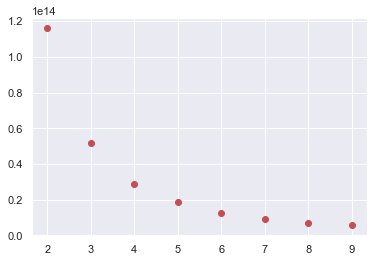

In [40]:
# plot inertia and look for bend
x = list(range(2,10))
y = []
for i in x:
    cluster = KMeans(n_clusters=i)
    model = cluster.fit_predict(X)
    y.append(cluster.inertia_)

plt.plot(x,y, 'ro')

In [41]:
# using 5 as optimal K value, fit and predict
clusterer = KMeans(n_clusters =5, random_state=1)
cluster = clusterer.fit_predict(X)

In [42]:
# Use PCA to visualize clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
existing_2d = pca.fit_transform(X)
xs = existing_2d[:,0]

ys = existing_2d[:,1]

new_df = pd.DataFrame(X.index)
new_df['cluster'] = cluster
new_df['x'] = xs
new_df['y'] = ys

#See balance of clusters
print(new_df.cluster.value_counts())

4    26470
3    26278
2    26216
1    26145
0    26100
Name: cluster, dtype: int64


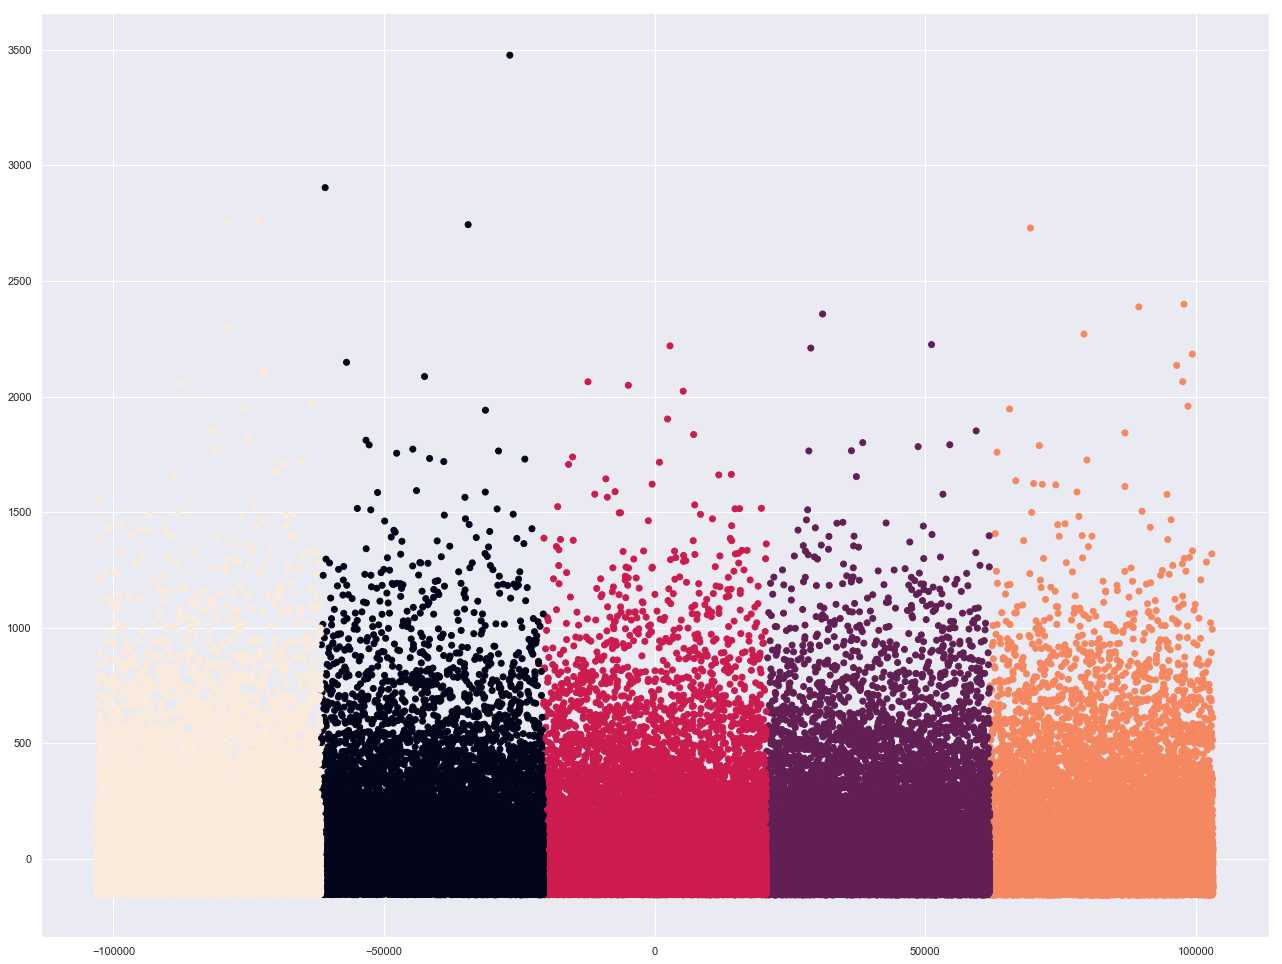

In [43]:
fig, ax = plt.subplots(figsize = (22, 17))
plt.scatter(xs,ys, c=cluster)
plt.show()

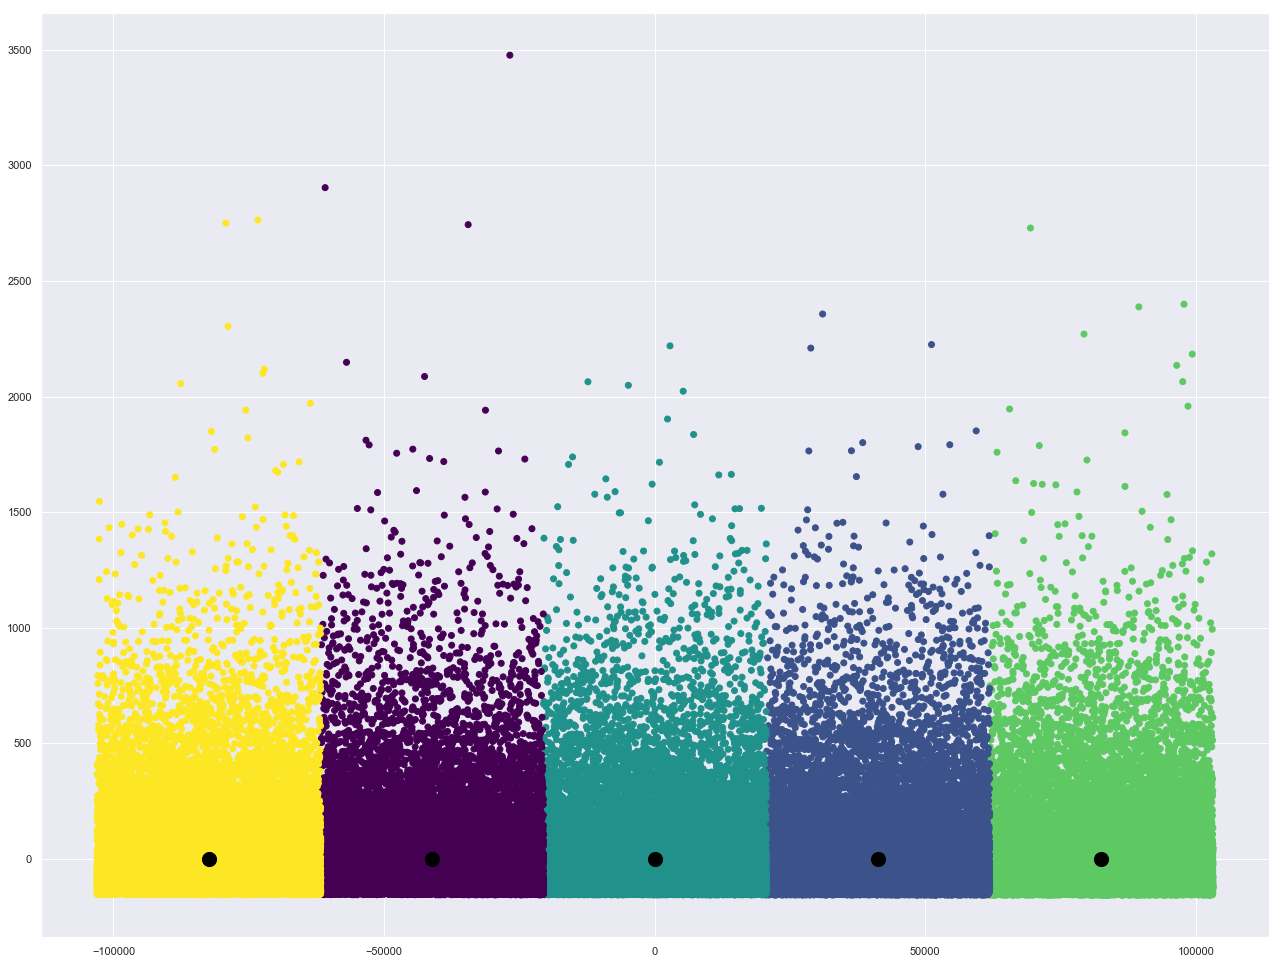

In [44]:
centers = pca.transform(clusterer.cluster_centers_)

fig, ax = plt.subplots(figsize = (22, 17))
plt.scatter(xs,ys, c=cluster, cmap='viridis')

plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha= 1)

In [45]:
user_avg.head()

,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name
user_id,,,,,,
1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...
2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


In [46]:
# 0, 1 is the coordinate of the user

pca_df = pd.DataFrame(existing_2d)
pca_df['user_id'] = user_avg.index
pca_df['cluster'] = clusterer.predict(X)
pca_df.head(10)

,0,1,user_id,cluster
0,103165.823783,-100.145273,1,3
1,103164.825887,35.887567,2,3
2,103161.823439,-122.388244,5,3
3,103159.826066,47.294740,7,3
4,103158.823616,-110.716129,8,3
5,103157.824034,-83.694595,9,3
6,103156.825071,-16.663730,10,3
7,103153.824131,-77.855025,13,3
8,103152.826112,50.638056,14,3
9,103149.827452,136.482937,17,3


In [47]:
# Show most popular products in each cluster

cluster_order_info = pd.merge(pca_df, Prior_User_Order_Product_inner, how='left', on='user_id')


In [48]:
user_info = pd.merge(pca_df, user_avg, how='left', on='user_id')


In [49]:
cluster_means = user_info.groupby(['cluster','user_id'], as_index=False).agg('mean')


In [50]:
print('Cluster 1 mean of num of products: ' + str(cluster_means[cluster_means['cluster'] == 0].num_of_products.agg('mean')))
print('Cluster 2 mean of num of products: ' + str(cluster_means[cluster_means['cluster'] == 1].num_of_products.agg('mean')))
print('Cluster 3 mean of num of products: ' + str(cluster_means[cluster_means['cluster'] == 2].num_of_products.agg('mean')))
print('Cluster 4 mean of num of products: ' + str(cluster_means[cluster_means['cluster'] == 3].num_of_products.agg('mean')))
print('Cluster 5 mean of num of products: ' + str(cluster_means[cluster_means['cluster'] == 4].num_of_products.agg('mean')))

Cluster 1 mean of num of products: 155.3052490421456
Cluster 2 mean of num of products: 159.19751386498373
Cluster 3 mean of num of products: 158.30065608788527
Cluster 4 mean of num of products: 157.59209224446306
Cluster 5 mean of num of products: 156.21798262183603


In [53]:
print('Cluster 1 mean of days since prior order: ' + str(cluster_means[cluster_means['cluster'] == 0].days_since_prior_order.agg('mean')))
print('Cluster 2 mean of days since prior order: ' + str(cluster_means[cluster_means['cluster'] == 1].days_since_prior_order.agg('mean')))
print('Cluster 3 mean of days since prior order: ' + str(cluster_means[cluster_means['cluster'] == 2].days_since_prior_order.agg('mean')))
print('Cluster 4 mean of days since prior order: ' + str(cluster_means[cluster_means['cluster'] == 3].days_since_prior_order.agg('mean')))
print('Cluster 5 mean of days since prior order: ' + str(cluster_means[cluster_means['cluster'] == 4].days_since_prior_order.agg('mean')))

Cluster 1 mean of days since prior order: 15.459954807795587
Cluster 2 mean of days since prior order: 15.440426028935738
Cluster 3 mean of days since prior order: 15.480914538080286
Cluster 4 mean of days since prior order: 15.418067335838904
Cluster 5 mean of days since prior order: 15.537004685441497


In [58]:
cluster_user = user_info[['user_id','cluster','product_name']]
cluster_user.head()

,user_id,cluster,product_name
0,1,3,Soda Original_Beef_Jerky Pistachios Organic_St...
1,2,3,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
2,5,3,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
3,7,3,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
4,8,3,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


In [65]:
cluster_order_info = pd.merge(pca_df, Prior_User_Order_Product_inner, how='left', on='user_id')
cluster_product = cluster_order_info[['user_id','cluster','product_no_space']]
cluster_count = cluster_product.groupby(['cluster','product_no_space']).agg('count')
top_products = cluster_count['user_id'].groupby(level=0, group_keys=False).nlargest(10).reset_index()

In [66]:
# Top 10 products in each cluster
top_products = cluster_count['user_id'].groupby(level=0, group_keys=False).nlargest(10).reset_index()
top_products.head()

,cluster,product_no_space,user_id
0,0,Banana,59339
1,0,Bag_of_Organic_Bananas,46706
2,0,Organic_Strawberries,33748
3,0,Organic_Baby_Spinach,29799
4,0,Organic_Hass_Avocado,26866


In [67]:
top_products[top_products['cluster'] == 0][['product_no_space','user_id']]

,product_no_space,user_id
0,Banana,59339
1,Bag_of_Organic_Bananas,46706
2,Organic_Strawberries,33748
3,Organic_Baby_Spinach,29799
4,Organic_Hass_Avocado,26866
5,Organic_Avocado,22211
6,Large_Lemon,19324
7,Limes,17779
8,Strawberries,17638
9,Organic_Whole_Milk,17453


In [68]:
top_products[top_products['cluster'] == 1][['product_no_space','user_id']]

,product_no_space,user_id
10,Banana,60074
11,Bag_of_Organic_Bananas,48479
12,Organic_Strawberries,33709
13,Organic_Baby_Spinach,30977
14,Organic_Hass_Avocado,27992
15,Organic_Avocado,22607
16,Large_Lemon,19278
17,Limes,17909
18,Strawberries,17894
19,Organic_Raspberries,17612


In [69]:
top_products[top_products['cluster'] == 2][['product_no_space','user_id']]

,product_no_space,user_id
20,Banana,60803
21,Bag_of_Organic_Bananas,47475
22,Organic_Strawberries,33855
23,Organic_Baby_Spinach,30848
24,Organic_Hass_Avocado,26527
25,Organic_Avocado,22112
26,Large_Lemon,19407
27,Limes,18367
28,Strawberries,18249
29,Organic_Whole_Milk,17871


In [70]:
top_products[top_products['cluster'] == 3][['product_no_space','user_id']]

,product_no_space,user_id
30,Banana,61109
31,Bag_of_Organic_Bananas,47966
32,Organic_Strawberries,33420
33,Organic_Baby_Spinach,31543
34,Organic_Hass_Avocado,28249
35,Organic_Avocado,23131
36,Large_Lemon,19406
37,Strawberries,18328
38,Organic_Raspberries,17778
39,Organic_Whole_Milk,17768


In [71]:
top_products[top_products['cluster'] == 4][['product_no_space','user_id']]

,product_no_space,user_id
40,Banana,59439
41,Bag_of_Organic_Bananas,49113
42,Organic_Strawberries,33810
43,Organic_Baby_Spinach,30892
44,Organic_Hass_Avocado,26796
45,Organic_Avocado,23193
46,Large_Lemon,19776
47,Strawberries,18375
48,Limes,17852
49,Organic_Whole_Milk,17714


In [72]:
wide_top_products =top_products.pivot(index='cluster', columns='product_no_space', values='user_id').fillna(0)
wide_top_products_percent = wide_top_products.div(wide_top_products.sum(axis=0), axis=1)
long_top_products = wide_top_products_percent.unstack().reset_index()
long_top_products.columns.values[2]='count'

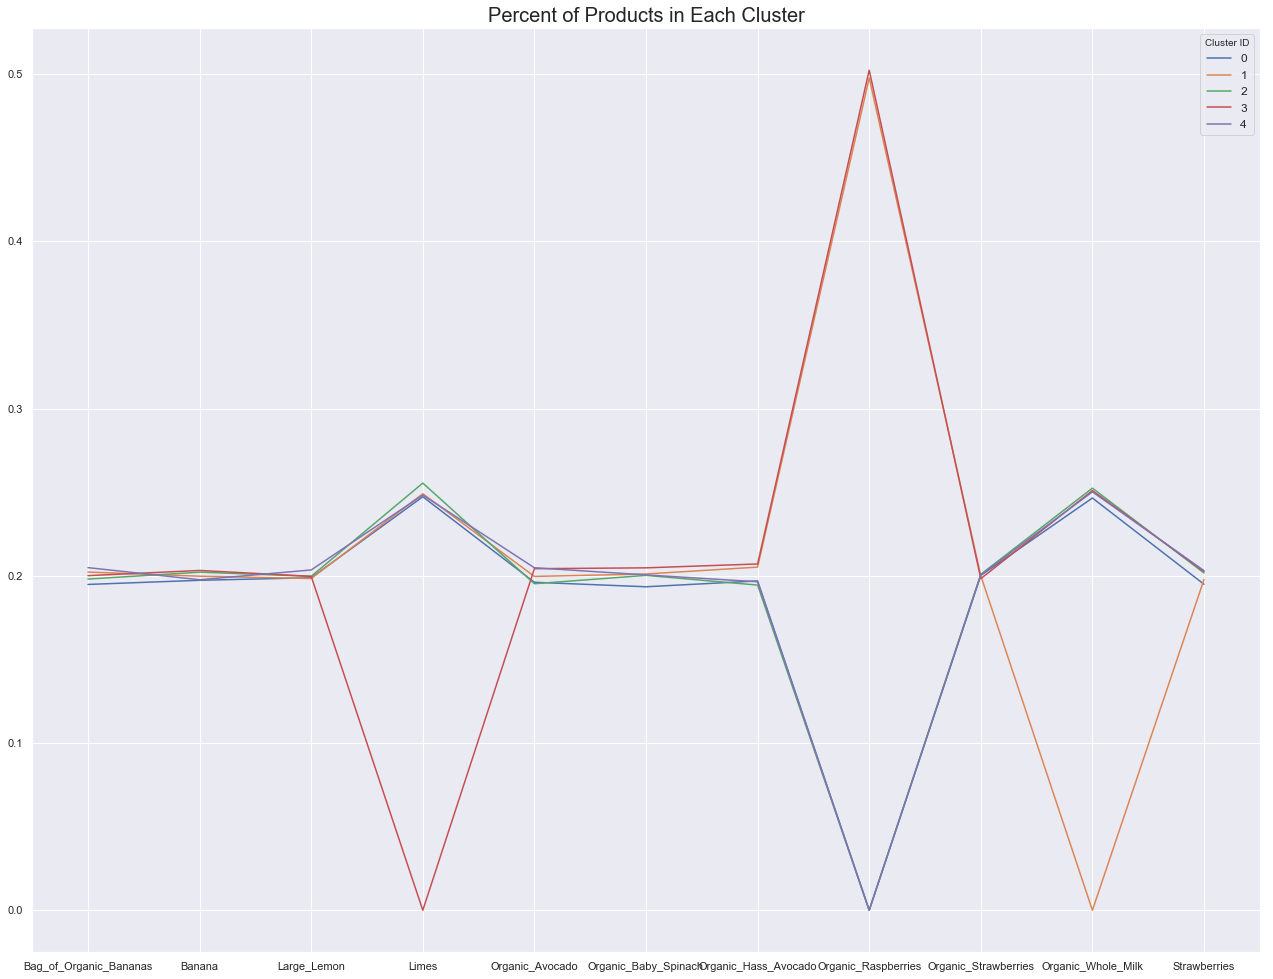

In [73]:
fig, ax1 = plt.subplots(figsize = (22, 17))

group1 = []
for i in range(5):
    group1.append(i)
ax1.plot(wide_top_products_percent.loc[group1].transpose())
ax1.legend(wide_top_products_percent.transpose().columns[0:10],title="Cluster ID",loc='upper right',prop={'size': 12})
ax1.set_title('Percent of Products in Each Cluster',size=20)

plt.show()
fig.set_dpi(300)
fig.savefig('cluster_product_frequency.png')